In [13]:
# Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [14]:
df_reviews = pd.read_parquet('../data/yelp_dataset/yelp_academic_dataset_review_0.parquet')
df_reviews2 = pd.read_parquet('../data/yelp_dataset/yelp_academic_dataset_review_1.parquet')

In [15]:
df_reviews = pd.concat([df_reviews, df_reviews2])

In [16]:
del df_reviews2

In [17]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        uint8         
 4   useful       uint32        
 5   funny        uint32        
 6   cool         uint32        
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), object(4), uint32(3), uint8(1)
memory usage: 353.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        uint8         
 4   useful       uint32        
 5   funny        uint32        
 6   cool         uint32        
 7   text         object        
 

# Ideias

- os ids são para sincronização apenas.
- as stars já estão sendo contabilizadas a média de cada review.
- useful funny e cool podem ser intensificadores dos embeddings dos textos.
- o texto será usado para extrair embeddings.

## Verificando useful, funny e cool

In [18]:
df_reviews[['useful', 'funny', 'cool']].describe()

,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06
mean,2.458864e+03,1.229166e+03,6.149185e+02
std,3.248946e+06,2.297352e+06,1.624473e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00
max,4.294967e+09,4.294967e+09,4.294967e+09


,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06
mean,2.458864e+03,1.229166e+03,6.149185e+02
std,3.248946e+06,2.297352e+06,1.624473e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00
max,4.294967e+09,4.294967e+09,4.294967e+09


In [19]:
# verificando os maiores valores
df_reviews.nlargest(10, 'funny')

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2201840,JcWLycg0Hdsz6LBNAqS37A,04j3r2Psfw_LxX1UXPhnyg,E3Qk7xTznkT0SABL2ltpHA,5,4294967295,4294967295,4294967295,The food was so much better than I expected. T...,2017-10-05 02:47:33
4383627,7tlF2NEDiFqMRjKBgTPJ3g,VKK7pPl6DfjL9H5b3n2yCA,qjstXewt23oCZnf86CsHXg,1,2,4294967295,2,The most horrible removal company I have ever ...,2017-02-25 23:40:34
6885693,pL_jmXOSPOMq71ZwrlRynQ,sMfFISqyKkxlLsRzYaL9Lw,iRIHK8-EwpeffwvoO4nzIA,1,112,792,107,Went there for a birthday dinner and had reser...,2017-02-19 13:26:19
6594545,ia5MN3Wnb17BV1j87Z0JqQ,22-JJw1bQrae7Cw5mG5mPQ,_EqGhRXzlUaTpu5eToC8MA,5,1,378,0,Went to dinner here with the wife and the in-l...,2013-02-14 03:59:35
6509845,pxtflm6aOEbqGrQ7zgKyqQ,P-O2VMMeS2Uh9Ko-NQgygA,_EqGhRXzlUaTpu5eToC8MA,5,1,375,0,Went to Brick's last night and it was amazing!...,2013-03-18 06:29:58
6664714,jdwKWblxwA31OfXxjtuZtA,Jed-PEquPj78qyejkevQyQ,_EqGhRXzlUaTpu5eToC8MA,4,6,370,0,I don't know why I used to think Bricks was a ...,2013-03-06 01:58:57
6545191,h96WBcp9v9l_8pfqkCaE5w,EsPErKV3vyeXabGT4kpHIQ,_EqGhRXzlUaTpu5eToC8MA,5,9,369,1,Bricks is easily the nicest restaurant in Reno...,2012-11-26 00:38:24
5803802,iqT0AiXqUOjbPz7jitwU4g,BuydhNCH23lA9R3sNEJD2Q,47OfnYwhB3NTM8Tx_sNnbw,3,1,361,0,"I'm torn about this review. Prices were steep,...",2013-03-04 07:33:31
6546248,a7JIzLKX5j5Hyw8_eyrBDA,zdIvdQXS_yW520WWlbA9Cg,_EqGhRXzlUaTpu5eToC8MA,4,5,357,1,Since my move to Reno I have heard very good t...,2012-11-03 19:14:59
6623094,Wr_ZbCFrrAmULSFm0qXCCw,TS2j_gt5qugbmQ1R_fq6TA,_EqGhRXzlUaTpu5eToC8MA,5,14,357,1,We ended up here for a low key bachelor party ...,2012-04-23 04:05:25


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2201840,JcWLycg0Hdsz6LBNAqS37A,04j3r2Psfw_LxX1UXPhnyg,E3Qk7xTznkT0SABL2ltpHA,5,4294967295,4294967295,4294967295,The food was so much better than I expected. T...,2017-10-05 02:47:33
4383627,7tlF2NEDiFqMRjKBgTPJ3g,VKK7pPl6DfjL9H5b3n2yCA,qjstXewt23oCZnf86CsHXg,1,2,4294967295,2,The most horrible removal company I have ever ...,2017-02-25 23:40:34
6885693,pL_jmXOSPOMq71ZwrlRynQ,sMfFISqyKkxlLsRzYaL9Lw,iRIHK8-EwpeffwvoO4nzIA,1,112,792,107,Went there for a birthday dinner and had reser...,2017-02-19 13:26:19
6594545,ia5MN3Wnb17BV1j87Z0JqQ,22-JJw1bQrae7Cw5mG5mPQ,_EqGhRXzlUaTpu5eToC8MA,5,1,378,0,Went to dinner here with the wife and the in-l...,2013-02-14 03:59:35
6509845,pxtflm6aOEbqGrQ7zgKyqQ,P-O2VMMeS2Uh9Ko-NQgygA,_EqGhRXzlUaTpu5eToC8MA,5,1,375,0,Went to Brick's last night and it was amazing!...,2013-03-18 06:29:58
6664714,jdwKWblxwA31OfXxjtuZtA,Jed-PEquPj78qyejkevQyQ,_EqGhRXzlUaTpu5eToC8MA,4,6,370,0,I don't know why I used to think Bricks was a ...,2013-03-06 01:58:57
6545191,h96WBcp9v9l_8pfqkCaE5w,EsPErKV3vyeXabGT4kpHIQ,_EqGhRXzlUaTpu5eToC8MA,5,9,369,1,Bricks is easily the nicest restaurant in Reno...,2012-11-26 00:38:24
5803802,iqT0AiXqUOjbPz7jitwU4g,BuydhNCH23lA9R3sNEJD2Q,47OfnYwhB3NTM8Tx_sNnbw,3,1,361,0,"I'm torn about this review. Prices were steep,...",2013-03-04 07:33:31
6546248,a7JIzLKX5j5Hyw8_eyrBDA,zdIvdQXS_yW520WWlbA9Cg,_EqGhRXzlUaTpu5eToC8MA,4,5,357,1,Since my move to Reno I have heard very good t...,2012-11-03 19:14:59
6623094,Wr_ZbCFrrAmULSFm0qXCCw,TS2j_gt5qugbmQ1R_fq6TA,_EqGhRXzlUaTpu5eToC8MA,5,14,357,1,We ended up here for a low key bachelor party ...,2012-04-23 04:05:25


> Há uma grave presença de outliers nas colunas useful, funny e cool.
> A maior parte dos valores são 0.
> As avalizações que recebem votos não passam de 1000 votos.

In [20]:
# alterando o valor máximo para 1000
df_reviews['useful'] = df_reviews['useful'].apply(lambda x: 1000 if x > 1000 else x)
df_reviews['funny'] = df_reviews['funny'].apply(lambda x: 1000 if x > 1000 else x)
df_reviews['cool'] = df_reviews['cool'].apply(lambda x: 1000 if x > 1000 else x)

In [21]:
df_reviews.nlargest(10, 'useful')

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1933674,plhadSWfXZFKRAhEztb6Dw,0Q4ouqkcwrVE_Im6a6Tomw,SJQePJL1bkeEk-6gp-6eeA,1,1000,0,0,This complaint has nothing to do with the qual...,2018-12-23 01:35:31
2008201,gk_9N_c-7oEgzrXVDaR8-g,lEOLrNxD4wknYyERp1FGXw,SJQePJL1bkeEk-6gp-6eeA,1,1000,0,0,Only bounce play place in Hendersonville and t...,2016-01-17 00:21:53
2046381,iYS4pfUCUPT_TEmW6BOnrA,1p8Pu1pvAsuNtuZDtn2OkQ,SJQePJL1bkeEk-6gp-6eeA,3,1000,0,0,Having been to bouncy places across the countr...,2017-01-18 18:11:15
2201840,JcWLycg0Hdsz6LBNAqS37A,04j3r2Psfw_LxX1UXPhnyg,E3Qk7xTznkT0SABL2ltpHA,5,1000,1000,1000,The food was so much better than I expected. T...,2017-10-05 02:47:33
6793158,b0HBLNn02tkpC9rIyPRc_Q,aMR0N5sy95Qz0sUjg1bmYA,3RcQ7yTvJn9LLuXthTkWiQ,1,1000,0,0,Avoid at ALL costs. Do NOT do business with D...,2016-11-22 01:12:43
6640623,kTSpD7akIapty9AtLwJ11g,aPpOZxh2p1SoWxRL3ulYGQ,3RcQ7yTvJn9LLuXthTkWiQ,1,997,0,0,WORST COMPANY EVER!\n\nI had the unfortunate e...,2016-01-29 19:48:53
6595985,_KhSKjKKXoLgINKv7lTr0Q,CHN_EDxhElh9DS1Vud6-hA,3RcQ7yTvJn9LLuXthTkWiQ,1,969,0,0,I set up for automatic withdrawals online. On...,2016-09-28 23:04:48
6599431,TFlWosaJn3lVJwgm3nrVYA,9YOVI-bxiiOx0bTZ-J_Irw,3RcQ7yTvJn9LLuXthTkWiQ,1,933,0,0,If you are unfortunate enough to have to deal ...,2017-01-13 18:26:56
6639966,Gxdq755Cb8ItoHb9kynwlA,AGDsEynt1YHtUR9mQhf4ww,3RcQ7yTvJn9LLuXthTkWiQ,1,883,0,0,This company is a nightmare. I was in Army Ran...,2016-08-21 01:29:43
6702919,I4tJGAFdH3A_4p2cMBTAkw,7B3WYE0mgxKZ56672FGhKQ,3RcQ7yTvJn9LLuXthTkWiQ,1,868,0,0,"Okay, so it's tax time, April 1, and I need my...",2016-04-02 16:22:46


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1933674,plhadSWfXZFKRAhEztb6Dw,0Q4ouqkcwrVE_Im6a6Tomw,SJQePJL1bkeEk-6gp-6eeA,1,1000,0,0,This complaint has nothing to do with the qual...,2018-12-23 01:35:31
2008201,gk_9N_c-7oEgzrXVDaR8-g,lEOLrNxD4wknYyERp1FGXw,SJQePJL1bkeEk-6gp-6eeA,1,1000,0,0,Only bounce play place in Hendersonville and t...,2016-01-17 00:21:53
2046381,iYS4pfUCUPT_TEmW6BOnrA,1p8Pu1pvAsuNtuZDtn2OkQ,SJQePJL1bkeEk-6gp-6eeA,3,1000,0,0,Having been to bouncy places across the countr...,2017-01-18 18:11:15
2201840,JcWLycg0Hdsz6LBNAqS37A,04j3r2Psfw_LxX1UXPhnyg,E3Qk7xTznkT0SABL2ltpHA,5,1000,1000,1000,The food was so much better than I expected. T...,2017-10-05 02:47:33
6793158,b0HBLNn02tkpC9rIyPRc_Q,aMR0N5sy95Qz0sUjg1bmYA,3RcQ7yTvJn9LLuXthTkWiQ,1,1000,0,0,Avoid at ALL costs. Do NOT do business with D...,2016-11-22 01:12:43
6640623,kTSpD7akIapty9AtLwJ11g,aPpOZxh2p1SoWxRL3ulYGQ,3RcQ7yTvJn9LLuXthTkWiQ,1,997,0,0,WORST COMPANY EVER!\n\nI had the unfortunate e...,2016-01-29 19:48:53
6595985,_KhSKjKKXoLgINKv7lTr0Q,CHN_EDxhElh9DS1Vud6-hA,3RcQ7yTvJn9LLuXthTkWiQ,1,969,0,0,I set up for automatic withdrawals online. On...,2016-09-28 23:04:48
6599431,TFlWosaJn3lVJwgm3nrVYA,9YOVI-bxiiOx0bTZ-J_Irw,3RcQ7yTvJn9LLuXthTkWiQ,1,933,0,0,If you are unfortunate enough to have to deal ...,2017-01-13 18:26:56
6639966,Gxdq755Cb8ItoHb9kynwlA,AGDsEynt1YHtUR9mQhf4ww,3RcQ7yTvJn9LLuXthTkWiQ,1,883,0,0,This company is a nightmare. I was in Army Ran...,2016-08-21 01:29:43
6702919,I4tJGAFdH3A_4p2cMBTAkw,7B3WYE0mgxKZ56672FGhKQ,3RcQ7yTvJn9LLuXthTkWiQ,1,868,0,0,"Okay, so it's tax time, April 1, and I need my...",2016-04-02 16:22:46


Para lidar com as diferenças de escala, vamos usar escala logarítmica.

In [22]:
# replace de nulos por 0
df_reviews['useful'] = df_reviews['useful'].fillna(0)
df_reviews['funny'] = df_reviews['funny'].fillna(0)
df_reviews['cool'] = df_reviews['cool'].fillna(0)

In [23]:
# passando para escala logarítmica e adicionar a constante de euler para evitar log(0)
df_reviews["useful"] = np.log(df_reviews["useful"] + np.e)
df_reviews["funny"] = np.log(df_reviews["funny"] + np.e)
df_reviews["cool"] = np.log(df_reviews["cool"] + np.e)

In [24]:
# visualizando o histograma
df_reviews[['useful', 'funny', 'cool']].describe()

,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06
mean,1.260750e+00,1.077181e+00,1.114472e+00
std,3.823149e-01,2.197850e-01,2.652094e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.313262e+00,1.000000e+00,1.000000e+00
max,6.910470e+00,6.910470e+00,6.910470e+00


,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06
mean,1.260750e+00,1.077181e+00,1.114472e+00
std,3.823149e-01,2.197850e-01,2.652094e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.313262e+00,1.000000e+00,1.000000e+00
max,6.910470e+00,6.910470e+00,6.910470e+00


## Verificando o text

In [28]:
df_reviews['qtd_palavras'] = df_reviews['text'].apply(lambda x: len(x.split()))

<AxesSubplot:xlabel='qtd_palavras', ylabel='Count'>

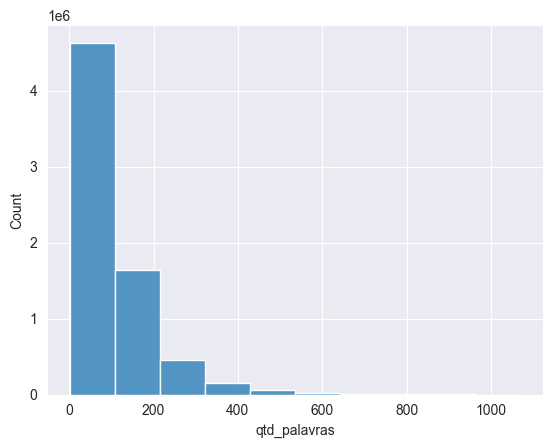

In [29]:
# plotando um histograma
sns.histplot(data=df_reviews['qtd_palavras'], bins=10)

> O bert vai lidar bem com essas avaliações, dado que sua entrada é de no máximo 512 tokens.

> Vou desconsiderar a data, mas seria interessante criar um tipo de penalização de acordo com a idade da avaliação: quanto mais velho, menor a relevância da avaliação.